#Penerapan Klasifikasi Random Forest untuk Analisis Kebutuhan Perawatan Medis

##Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

##Import Dataset

In [76]:
df = pd.read_csv('https://raw.githubusercontent.com/ekamarwati/Random-Forest/main/mental_health.csv')
df

Timestamp  Age  Gender         Country state self_employed  \
0     2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1     2014-08-27 11:29:37   44       M   United States    IN           NaN   
2     2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3     2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4     2014-08-27 11:30:22   31    Male   United States    TX           NaN   
...                   ...  ...     ...             ...   ...           ...   
1254  2015-09-12 11:17:21   26    male  United Kingdom   NaN            No   
1255  2015-09-26 01:07:35   32    Male   United States    IL            No   
1256  2015-11-07 12:36:58   34    male   United States    CA            No   
1257  2015-11-30 21:25:06   46       f   United States    NC            No   
1258  2016-02-01 23:04:31   25    Male   United States    IL            No   

     family_history treatment work_interfere    no_employees  ...  \
0                No       Yes          Often            6-25  ...   
1                No        No         Rarely  More than 1000  ...   
2                No        No         Rarely            6-25  ...   
3               Yes       Yes          Often          26-100  ...   
4                No        No          Never         100-500  ...   
...             ...       ...            ...             ...  ...   
1254             No       Yes            NaN          26-100  ...   
1255            Yes       Yes          Often          26-100  ...   
1256            Yes       Yes      Sometimes  More than 1000  ...   
1257             No        No            NaN         100-500  ...   
1258            Yes       Yes      Sometimes          26-100  ...   

                   leave mental_health_consequence phys_health_consequence  \
0          Somewhat easy                        No                      No   
1             Don't know                     Maybe                      No   
2     Somewhat difficult                        No                      No   
3     Somewhat difficult                       Yes                     Yes   
4             Don't know                        No                      No   
...                  ...                       ...                     ...   
1254       Somewhat easy                        No                      No   
1255  Somewhat difficult                        No                      No   
1256  Somewhat difficult                       Yes                     Yes   
1257          Don't know                       Yes                      No   
1258          Don't know                     Maybe                      No   

         coworkers    supervisor mental_health_interview  \
0     Some of them           Yes                      No   
1               No            No                      No   
2              Yes           Yes                     Yes   
3     Some of them            No                   Maybe   
4     Some of them           Yes                     Yes   
...            ...           ...                     ...   
1254  Some of them  Some of them                      No   
1255  Some of them           Yes                      No   
1256            No            No                      No   
1257            No            No                      No   
1258  Some of them            No                      No   

     phys_health_interview mental_vs_physical obs_consequence comments  
0                    Maybe                Yes              No      NaN  
1                       No         Don't know              No      NaN  
2                      Yes                 No              No      NaN  
3                    Maybe                 No             Yes      NaN  
4                      Yes         Don't know              No      NaN  
...                    ...                ...             ...      ...  
1254                    No         Don't know              No      NaN  
1255    

##Tujuan Analisis Data

Melakukan klasifikasi untuk memprediksi kebutuhan perawatan medis karyawan terkait kesehatan mentalnya dengan menggunakan algoritma random forest.

##Data Preprocessing

In [77]:
#mengecek jumlah baris dan kolom dataset
df.shape

(1259, 27)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [79]:
#statistik deskriptif dari data
df.describe()

Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11

In [80]:
#Visualisasi usia peserta survei
df['Age'].value_counts().plot(kind='bar', figsize=(14,8))

Dari gambar diatas diketahui bahwa terdapat maximum usia adalah 99999999999 dan minimum usia adalah -1726. Sehingga data ini perlu diperbaiki.

In [81]:
df.query('Age<=10|Age>=65')

Timestamp          Age              Gender         Country  \
143   2014-08-27 12:39:14          -29                Male   United States   
364   2014-08-27 15:05:21          329                Male   United States   
390   2014-08-27 15:24:47  99999999999                 All        Zimbabwe   
560   2014-08-27 19:17:07           65                Male   United States   
715   2014-08-28 10:07:53        -1726                male  United Kingdom   
734   2014-08-28 10:35:55            5                Male   United States   
989   2014-08-29 09:10:58            8  A little about you    Bahamas, The   
1127  2014-08-30 20:55:11           -1                   p   United States   
1182  2014-10-02 21:25:16           72              Female   United States   

     state self_employed family_history treatment work_interfere  \
143     MN            No             No        No            NaN   
364     OH            No             No       Yes          Often   
390    NaN           Yes            Yes       Yes          Often   
560     FL           Yes             No        No            NaN   
715    NaN            No             No       Yes      Sometimes   
734     OH            No             No        No            NaN   
989     IL           Yes            Yes       Yes          Often   
1127    AL           Yes            Yes       Yes          Often   
1182    IN            No            Yes       Yes          Never   

        no_employees  ...               leave mental_health_consequence  \
143   More than 1000  ...          Don't know                        No   
364             6-25  ...          Don't know                     Maybe   
390              1-5  ...      Very difficult                       Yes   
560             6-25  ...           Very easy                     Maybe   
715           26-100  ...  Somewhat difficult                       Yes   
734          100-500  ...       Somewhat easy                        No   
989              1-5  ...           Very easy                       Yes   
1127             1-5  ...           Very easy                       Yes   
1182        500-1000  ...       Somewhat easy                     Maybe   

     phys_health_consequence     coworkers supervisor mental_health_interview  \
143                       No  Some of them        Yes                      No   
364                       No  Some of them         No                      No   
390                      Yes            No         No                     Yes   
560                       No  Some of them         No                      No   
715                       No            No         No                      No   
734                       No           Yes        Yes                      No   
989                      Yes           Yes        Yes                     Yes   
1127                     Yes           Yes        Yes                     Yes   
1182                   Maybe  Some of them        Yes                      No   

     phys_health_interview mental_vs_physical obs_consequence  \
143                     No         Don't know              No   
364                     No                 No              No   
390                     No                 No             Yes   
560                     No                Yes              No   
715                  Maybe         Don't know              No   
734                     No                Yes              No   
989                    Yes                Yes             Yes   
1127                   Yes                Yes             Yes   
1182                    No         Don't know             Yes   

                                               comments  
143                                                 NaN  
364                                                 NaN  
390                                                 NaN  
560                                                 NaN  
715                                                

In [82]:
df=df[df.Age>18]

In [83]:
df=df[df.Age<65]

In [84]:
#cek kembali data setelah diperbaiki
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1242 non-null   object
 1   Age                        1242 non-null   int64 
 2   Gender                     1242 non-null   object
 3   Country                    1242 non-null   object
 4   state                      733 non-null    object
 5   self_employed              1224 non-null   object
 6   family_history             1242 non-null   object
 7   treatment                  1242 non-null   object
 8   work_interfere             983 non-null    object
 9   no_employees               1242 non-null   object
 10  remote_work                1242 non-null   object
 11  tech_company               1242 non-null   object
 12  benefits                   1242 non-null   object
 13  care_options               1242 non-null   object
 14  wellness

In [85]:
df.describe()

Age
count  1242.000000
mean     32.097424
std       7.087187
min      19.000000
25%      27.000000
50%      31.000000
75%      36.000000
max      62.000000

Dari hasil di atas diperoleh hasil yang lebih baik dari sebelumnya, yaitu rata-rata usia peserta survei 32,09 tahun.

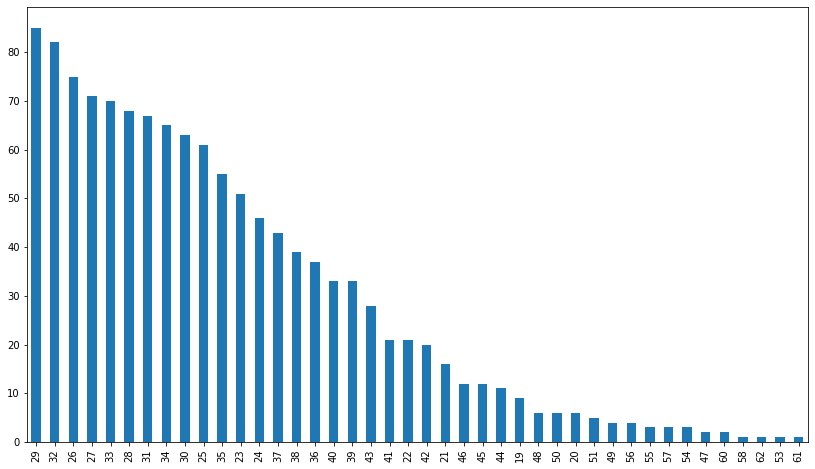

In [86]:
#visualisasi data usia peserta survei setelah diperbaiki

df['Age'].value_counts().plot(kind='bar', figsize=(14,8))

In [87]:
#Mencari data unik pada kolom Gender

df['Gender'].value_counts()

Male                                              608
male                                              202
Female                                            119
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Man                                                 2
Cis Male                                            2
Female                                              2
Female (trans)                                      2
msle                                                1
Trans woman                                         1
male leaning androgynous                            1
Mail                        

Dari hasil diatas diperoleh bahwa terdapat banyak kesalahan dalam penulisan maupun kesamaan kata, sehingga diperlukan pengelompokkan Gender menjadi 3, yaitu male (laki-laki), female (perempuan) dan trans/other.

In [88]:
male = ['Male ', 'male', 'male ', 'M', 'm', 'make', 'man', 'cis man', 'malr', 'mail', 'mal', 'Make', 'Male', 'Cis Male', 'Cis Man', 'Male (CIS)', 'male (cis)', 'Mal', 'ostensibly male, unsure what that really means', 'cis male', 'Malr', 'maile', 'msle', 'Mail', 'Man']
female = ['Female', 'female', 'female ', 'femake', 'cis female', 'F', 'f', 'Woman', 'Female ', 'cis-female/femme', 'Femake', 'Cis Female', 'femail', 'woman', 'Female (cis)', 'female (cis)']
trans_other = ['Nah','non-binary','Male-ish','trans-female','queer','Guy (-ish) ^_^','enby','Androgyne','neuter','queer/she/they','nah','Agender','Genderqueer','male leaning androgynous','fluid','trans woman','Female (trans)',"Trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "Enby", "fluid", "genderqueer", "Androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "Trans woman", "Neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"] 

In [89]:
df.Gender = df.Gender = df.Gender.replace(male, 'male')
df.Gender = df.Gender.replace(female, 'female')
df.Gender = df.Gender.replace(trans_other, 'trans/other')

In [90]:
df['Gender'].value_counts()

male           980
female         245
trans/other     17
Name: Gender, dtype: int64

In [91]:
gender_male = df[df.Gender == 'male']
gender_female = df[df.Gender == 'female']
gender_trans = df[df.Gender == 'trans/other']

##Asumsi-Asumsi Awal

Akan dilihat apakah riwayat keluarga mempengaruhi peserta survei dalam menangani kesehatan mental mereka atau tidak.

In [93]:
fam_history_pos = df[df.family_history == 'Yes']
fam_history_neg = df[df.family_history == 'No']

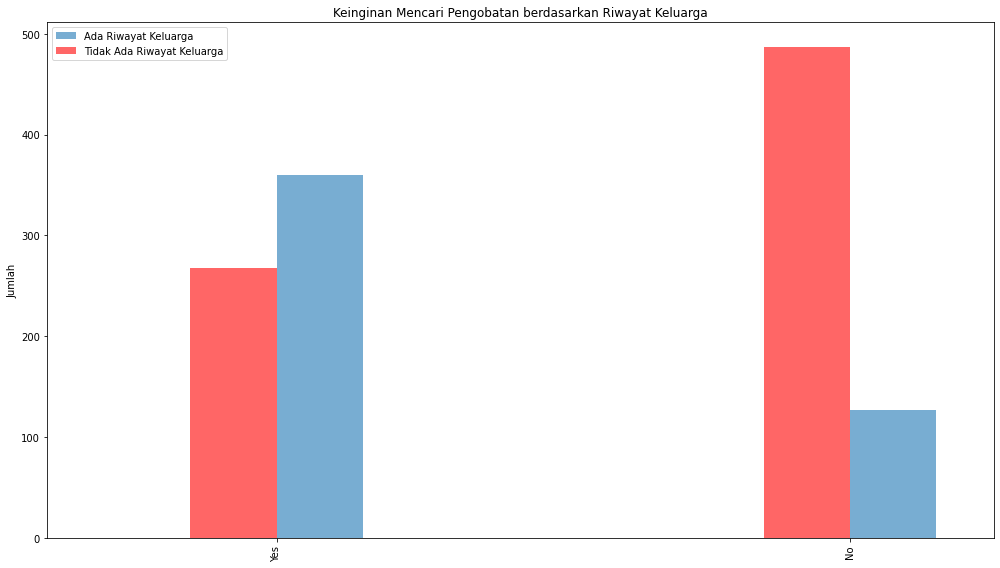

In [94]:
ax = fam_history_pos['treatment'].value_counts().plot(kind='bar', figsize = (14,8), alpha = 0.6, label = 'Ada Riwayat Keluarga', width=0.15, position = 0);
ax = fam_history_neg['treatment'].value_counts().sort_values(ascending=True).plot(kind='bar', figsize = (14,8), alpha = 0.6, color = 'r', label = 'Tidak Ada Riwayat Keluarga', width= 0.15, position = 1, title='Keinginan Mencari Pengobatan berdasarkan Riwayat Keluarga')
ax.set_ylabel("Jumlah")
plt.tight_layout()
plt.legend();

Kita dapat melihat dari grafik ini, tampaknya orang-orang dengan riwayat keluarga kesehatan mental jauh lebih mungkin untuk mencari pengobatan dibandingkan dengan mereka yang tidak pernah memiliki riwayat keluarga.

In [19]:
gender_male['seek_help'].value_counts()

No            510
Don't know    283
Yes           187
Name: seek_help, dtype: int64

Asumsi lain yang ingin diperiksa adalah apakah identifikasi gender seseorang memengaruhi cara mereka menangani kesehatan mental mereka atau tidak. Akan diuji asumsi ini dengan merencanakan jumlah peserta yang melakukan dan tidak mencari bantuan sesuai dengan jenis kelamin.

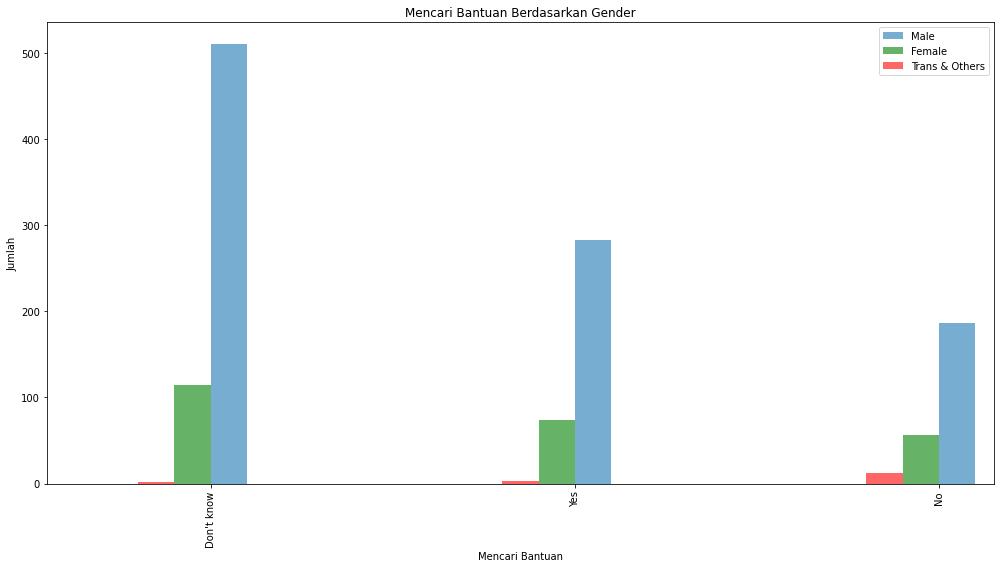

In [20]:
ax = gender_male['seek_help'].value_counts().plot(kind='bar', figsize = (14,8), alpha = 0.6, label = 'Male', width=0.1, position = 0);
ax = gender_female['seek_help'].value_counts().plot(kind='bar', figsize = (14,8), alpha = 0.6, label = 'Female', width=0.1, position = 1, color = 'g');
ax = gender_trans['seek_help'].value_counts().sort_values(ascending=True).plot(kind='bar', figsize = (14,8), alpha = 0.6, color = 'r', label = 'Trans & Others', width= 0.1, position = 2, title='Mencari Bantuan Berdasarkan Gender')

ax.set_xlabel("Mencari Bantuan")
ax.set_ylabel("Jumlah")
plt.tight_layout()
plt.legend();

Sepertinya kategori trans/other bertentangan dengan tren yang ditunjukkan oleh pria dan wanita. Akan diperlihatkan khusus gender trans/other untuk mendapatkan tampilan yang lebih baik.

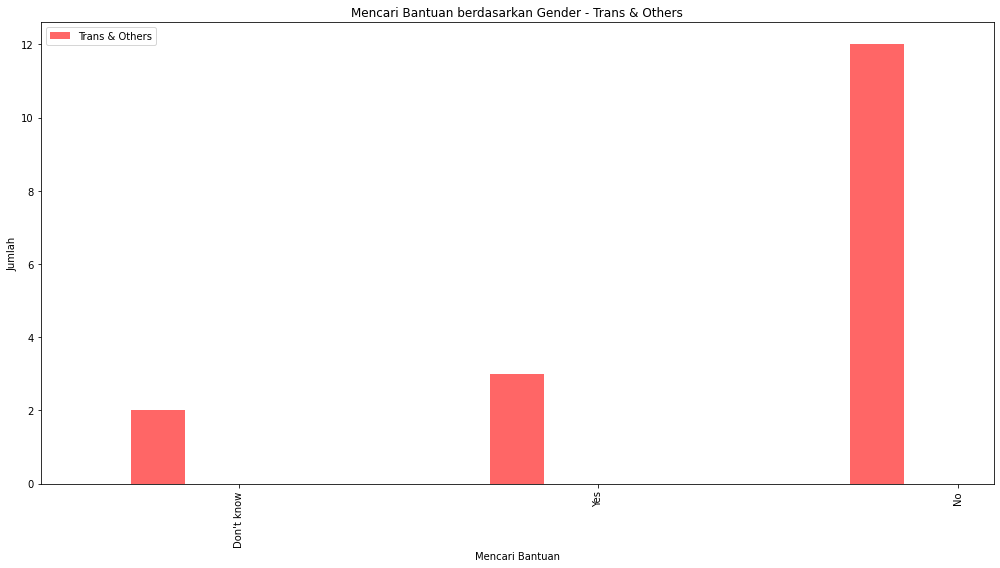

In [21]:
ax = gender_trans['seek_help'].value_counts().sort_values(ascending=True).plot(kind='bar', figsize = (14,8), alpha = 0.6, color = 'r', label = 'Trans & Others', width= 0.15, position = 2, title='Mencari Bantuan berdasarkan Gender - Trans & Others')
ax.set_xlabel("Mencari Bantuan")
ax.set_ylabel("Jumlah")
plt.tight_layout()
plt.legend();

Kategori trans/other berkorelasi negatif dengan kategori laki-laki dan perempuan. Mayoritas tidak mencari bantuan.

##Menyiapkan Algoritma Random Forest

Dengan menggunakan KlasifikasiRandom Forest, pertama-tama akan dilihat apakah model yang dibuat dapat memprediksi apakah seorang peserta akan mencari perawatan secara akurat atau tidak. Setelah itu, dengan melihat indeks gini, akan dilihat fitur (variabel) yang paling penting dalam menentukan faktor ini.

In [95]:
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [96]:
df.drop('Timestamp',axis=1,inplace=True)
df.drop('self_employed',axis=1,inplace=True)
df.drop('work_interfere',axis=1,inplace=True)
df.drop('Country',axis=1,inplace=True)
df.drop('state',axis=1,inplace=True)

In [97]:
df.head()

Age  Gender family_history treatment    no_employees remote_work  \
0   37  female             No       Yes            6-25          No   
1   44    male             No        No  More than 1000          No   
2   32    male             No        No            6-25          No   
3   31    male            Yes       Yes          26-100          No   
4   31    male             No        No         100-500         Yes   

  tech_company    benefits care_options wellness_program  ...  \
0          Yes         Yes     Not sure               No  ...   
1           No  Don't know           No       Don't know  ...   
2          Yes          No           No               No  ...   
3          Yes          No          Yes               No  ...   
4          Yes         Yes           No       Don't know  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1          Don't know                     Maybe                      No   
2  Somewhat difficult                        No                      No   
3  Somewhat difficult                       Yes                     Yes   
4          Don't know                        No                      No   

      coworkers supervisor mental_health_interview phys_health_interview  \
0  Some of them        Yes                      No                 Maybe   
1            No         No                      No                    No   
2           Yes        Yes                     Yes                   Yes   
3  Some of them         No                   Maybe                 Maybe   
4  Some of them        Yes                     Yes                   Yes   

  mental_vs_physical obs_consequence comments  
0                Yes              No      NaN  
1         Don't know              No      NaN  
2                 No              No      NaN  
3                 No             Yes      NaN  
4         Don't know              No      NaN  

[5 rows x 22 columns]

In [100]:
#Membuat nama kolom yang baru

col_name = df.columns.values

In [101]:
le = LabelEncoder()

In [102]:
df.family_history = le.fit_transform(df.family_history) 
df.mental_health_consequence = le.fit_transform(df.mental_health_consequence)
df.phys_health_consequence = le.fit_transform(df.phys_health_consequence)
df.coworkers = le.fit_transform(df.coworkers)
df.supervisor = le.fit_transform(df.supervisor)
df.mental_health_interview = le.fit_transform(df.mental_health_interview)
df.phys_health_interview = le.fit_transform(df.phys_health_interview)
df.mental_vs_physical = le.fit_transform(df.mental_vs_physical)
df.obs_consequence = le.fit_transform(df.obs_consequence)
df.remote_work = le.fit_transform(df.remote_work)
df.tech_company = le.fit_transform(df.tech_company)
df.benefits = le.fit_transform(df.benefits)
df.care_options = le.fit_transform(df.care_options)
df.wellness_program = le.fit_transform(df.wellness_program)
df.seek_help = le.fit_transform(df.seek_help)
df.anonymity = le.fit_transform(df.anonymity)

In [103]:
#membuat urutan dalam nomor perusahaan

df.loc[df['no_employees']=='1-5',['no_employees']]=1
df.loc[df['no_employees']=='6-25',['no_employees']]=2
df.loc[df['no_employees']=='26-100',['no_employees']]=3
df.loc[df['no_employees']=='100-500',['no_employees']]=4
df.loc[df['no_employees']=='500-1000',['no_employees']]=5
df.loc[df['no_employees']=='More than 1000',['no_employees']]=6

In [104]:
df['leave'].replace(['Very easy', 'Somewhat easy', "Don\'t know", 'Somewhat difficult', 'Very difficult'], [1, 2, 3, 4, 5],inplace=True)

In [105]:
df.loc[df['Gender']=='male',['Gender']]=1
df.loc[df['Gender']=='female',['Gender']]=2
df.loc[df['Gender']=='trans/other',['Gender']]=3

In [106]:
df.head()

Age Gender  family_history treatment no_employees  remote_work  \
0   37      2               0       Yes            2            0   
1   44      1               0        No            6            0   
2   32      1               0        No            2            0   
3   31      1               1       Yes            3            0   
4   31      1               0        No            4            1   

   tech_company  benefits  care_options  wellness_program  ...  anonymity  \
0             1         2             1                 1  ...          2   
1             0         0             0                 0  ...          0   
2             1         1             0                 1  ...          0   
3             1         1             2                 1  ...          1   
4             1         2             0                 0  ...          0   

   leave  mental_health_consequence  phys_health_consequence  coworkers  \
0      2                          1                        1          1   
1      3                          0                        1          0   
2      4                          1                        1          2   
3      4                          2                        2          1   
4      3                          1                        1          1   

   supervisor  mental_health_interview  phys_health_interview  \
0           2                        1                      0   
1           0                        1                      1   
2           2                        2                      2   
3           0                        0                      0   
4           2                        2                      2   

   mental_vs_physical  obs_consequence  
0                   2                0  
1                   0                0  
2                   1                0  
3                   1                1  
4                   0                0  

[5 rows x 21 columns]

In [107]:
x = df.drop(['treatment'],axis=1)
X = x.values
y = df['treatment'].values
y = le.fit_transform(y) #yes:1, no:0

In [108]:
#membagi data menjadi data testing dan data training sebanyak 80:20

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [109]:
clf = RandomForestClassifier(max_depth=40,min_samples_split=10, n_estimators=500, criterion = 'entropy', random_state=1)
clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=40, min_samples_split=10,
                       n_estimators=500, random_state=1)

In [110]:
clf_pred = clf.predict(x_test)

In [111]:
y_test

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1])

In [112]:
clf.predict_proba(x_train)[0:10]

array([[0.83704736, 0.16295264],
       [0.50233751, 0.49766249],
       [0.23629088, 0.76370912],
       [0.63603799, 0.36396201],
       [0.75086748, 0.24913252],
       [0.46374041, 0.53625959],
       [0.7132249 , 0.2867751 ],
       [0.81303453, 0.18696547],
       [0.88545292, 0.11454708],
       [0.44839096, 0.55160904]])

In [113]:
list(zip(x_train,clf.feature_importances_))

[(array([30, 1, 0, 2, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0],
        dtype=object), 0.1288123149367896),
 (array([35, 2, 0, 4, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0],
        dtype=object), 0.03684465845687477),
 (array([32, 1, 1, 2, 1, 1, 2, 0, 1, 1, 0, 3, 1, 1, 2, 2, 0, 0, 2, 0],
        dtype=object), 0.13769147726055747),
 (array([31, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 4, 1, 1, 1, 1, 1, 0, 2, 0],
        dtype=object), 0.0653748089918974),
 (array([36, 1, 0, 2, 0, 1, 2, 0, 1, 1, 2, 3, 0, 1, 0, 0, 1, 1, 0, 0],
        dtype=object), 0.02457734790734361),
 (array([30, 2, 0, 6, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0],
        dtype=object), 0.01973579242114457),
 (array([62, 1, 0, 6, 0, 1, 2, 2, 0, 2, 0, 3, 0, 1, 1, 2, 0, 0, 2, 0],
        dtype=object), 0.061338325686798895),
 (array([28, 1, 0, 2, 0, 1, 0, 0, 1, 1, 0, 3, 1, 1, 1, 1, 1, 0, 0, 0],
        dtype=object), 0.0789547315106834),
 (array([31, 1, 0, 4, 1, 1, 0, 0, 0, 0, 0, 3, 0, 0, 1, 1, 0, 0, 0, 0],
   

##Performa Measure

In [114]:
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score

In [115]:
for i in range(4, 10):
    clf = RandomForestClassifier(criterion='entropy', max_depth=i)
    clf.fit(x_train, y_train)
    pred_clf = clf.predict(x_test)
    print('dengan max_depth: {}, Akurasi: {}'.format (i, metrics.accuracy_score(y_test, pred_clf)))
    print('dengan max_depth: {}, Recall: {}'.format(i,recall_score(y_test, pred_clf)))
    print('dengan max_depth: {}, Precision: {}'.format(i,precision_score(y_test, pred_clf)))
    print('dengan max_depth: {}, F1-Score: {}'.format(i,f1_score(y_test, pred_clf)))
    print('\n')

dengan max_depth: 4, Akurasi: 0.7550200803212851
dengan max_depth: 4, Recall: 0.7737226277372263
dengan max_depth: 4, Precision: 0.7794117647058824
dengan max_depth: 4, F1-Score: 0.7765567765567766


dengan max_depth: 5, Akurasi: 0.751004016064257
dengan max_depth: 5, Recall: 0.7591240875912408
dengan max_depth: 5, Precision: 0.7819548872180451
dengan max_depth: 5, F1-Score: 0.7703703703703703


dengan max_depth: 6, Akurasi: 0.7550200803212851
dengan max_depth: 6, Recall: 0.7737226277372263
dengan max_depth: 6, Precision: 0.7794117647058824
dengan max_depth: 6, F1-Score: 0.7765567765567766


dengan max_depth: 7, Akurasi: 0.7389558232931727
dengan max_depth: 7, Recall: 0.7299270072992701
dengan max_depth: 7, Precision: 0.78125
dengan max_depth: 7, F1-Score: 0.7547169811320755


dengan max_depth: 8, Akurasi: 0.7349397590361446
dengan max_depth: 8, Recall: 0.7299270072992701
dengan max_depth: 8, Precision: 0.7751937984496124
dengan max_depth: 8, F1-Score: 0.7518796992481204


dengan max_d

Output di atas menunjukkan akurasi terbaik dari model dengan depth yang berbeda-beda dan model yang memberikan akurasi maksimum sebesar 0,759 yaitu dengan depth 6.

In [117]:
clf = RandomForestClassifier(criterion='entropy', max_depth=6)
clf.fit(x_train, y_train)
pred_clf = clf.predict(x_test)
print('dengan max_depth: {}, Akurasi: {}'.format (6, metrics.accuracy_score(y_test, pred_clf)))
print('dengan max_depth: {}, Recall: {}'.format(6,recall_score(y_test, pred_clf)))
print('dengan max_depth: {}, Precision: {}'.format(6,precision_score(y_test, pred_clf)))
print('dengan max_depth: {}, F1-Score: {}'.format(6,f1_score(y_test, pred_clf)))
print('\n')

dengan max_depth: 6, Akurasi: 0.7590361445783133
dengan max_depth: 6, Recall: 0.7664233576642335
dengan max_depth: 6, Precision: 0.7894736842105263
dengan max_depth: 6, F1-Score: 0.7777777777777777




##Confusion Matrix

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

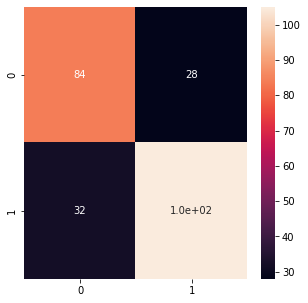

In [119]:
metrics.confusion_matrix(y_test, clf.predict(x_test))
plt.figure(figsize = (5,5))
sns.heatmap(metrics.confusion_matrix(y_test, clf.predict(x_test)), annot = True)

Anggap bahwa yang membutuhkan perawatan diberi label positif sedangkan yang tidak membutuhkan perawatan diberi label negatif.

1. **True Negatif (TN)**: model memprediksi bahwa peserta survei tidak membutuhkan perawatan dan pada kenyataannya peserta survei tersebut tidak membutuhkan perawatan.
2. **True Positif (TP)**: model memprediksi bahwa peserta survei membutuhkan perawatan dan pada kenyataanya peserta survei tersebut membutuhkan perawatan.
3. **False Negatif (FN)**: model memprediksi bahwa peserta survei tidak membutuhkan perawatan dan pada kenyataannya peserta survei tersebut membutuhkan perawatan.
4. **False Positif (FP)**: model memprediksi bahwa peserta survei membutuhkan perawatan dan pada kenyataanya peserta survei tersebut tidak membutuhkan perawatan.

Dari plot diatas diperoleh bahwa TN=84, FP=28, FN=32, TP=100.

##Visualisasi Random Forest

In [120]:
from sklearn.tree import export_graphviz

In [121]:
estimator = clf.estimators_[5]

In [122]:
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = df.columns[:-1],
                class_names = df['treatment'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [123]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

In [124]:
from IPython.display import Image
Image(filename = 'tree.png')